# Trig functions

In [1]:
import numpy as np
from matplotlib import ticker
import matplotlib.pyplot as plt

%matplotlib inline 

## funcs

In [2]:
def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    """
    author: Scott Centoni
    https://stackoverflow.com/questions/40642061/how-to-set-axis-ticks-in-multiples-of-pi-python-matplotlib
    """
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    """
    author: Scott Centoni
    https://stackoverflow.com/questions/40642061/how-to-set-axis-ticks-in-multiples-of-pi-python-matplotlib
    """    
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

def xy(x:np.array , y:[np.array], legends: [str], title: str, ylimit: float=None, 
      vlines=()):
    fig, ax = plt.subplots()
    fig.suptitle(title)
    for y1, lg1 in zip(y, legends):
        ax.plot(x, y1, label=lg1)
    ax.axhline(0, color='black', lw=1)
    ax.legend()
    ax.grid(True)
    ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 6))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    if ylimit is not None:
        ax.set_ylim(-abs(ylimit), abs(ylimit))
    for vl1 in vlines:
        ax.axvline(vl1, color='black', lw=1)

def sinusoidal(func, x, a = 1., b = 1., c = 0., d = 0.):
    """
    sinusoidal funcs sin and cos
    y = Asin(Bx − C) + D and y = Acos(Bx − C) + D
    """
    return a * func(b * x - c) + d


def tan(x, a = 1, b = 1, c=0):
    """
    y = Atan(Bx)
    """
    return a * np.tan(x) *b + c

# Graphing sine and cosine functions

In [17]:
x = np.linspace(-2*np.pi, 2*np.pi, 50)

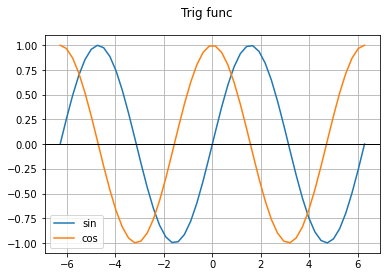

In [18]:
fig, ax = plt.subplots()
fig.suptitle('Trig func')
ax.plot(x, np.sin(x), label='sin')
ax.plot(x, np.cos(x), label='cos')
ax.axhline(0, color='black', lw=1)
ax.legend()
ax.grid(True)


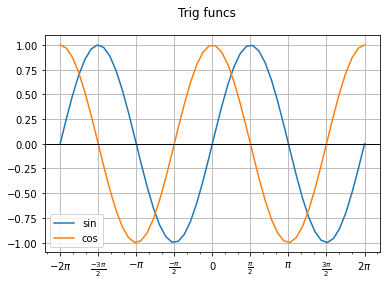

In [26]:
xy(x , [np.sin(x), np.cos(x)], ['sin', 'cos'], 'Trig funcs')

## Period
Period P = 2 pi / | B |

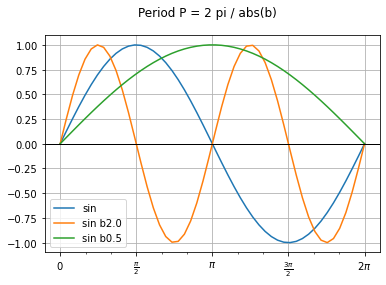

In [35]:
x = np.linspace(0, 2*np.pi, 50)
y0 = np.sin(x)
b1 = 2.
y1 = sinusoidal(np.sin, x, a = 1., b = b1, c = 0., d = 0.)
b2 = 1/2
y2 = sinusoidal(np.sin, x, a = 1., b = b2, c = 0., d = 0.)
xy(x , [y0, y1, y2], ['sin', f'sin b{b1}', f'sin b{b2}'], 'Period P = 2 pi / abs(b)')

## Amplitude
Amplitude A = | A | = 0.5 (max(y) - min(y))

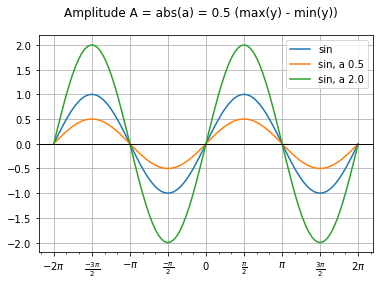

In [8]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y0 = np.sin(x)
a1 = 0.5
y1 = sinusoidal(np.sin, x, a = a1)
a2 = 2.
y2 = sinusoidal(np.sin, x, a = a2)
xy(x , [y0, y1, y2], ['sin', f'sin, a {a1}', f'sin, a {a2}'], 'Amplitude A = abs(a) = 0.5 (max(y) - min(y))')

## Phase shift

Phase shift = C/B <br>
If C > 0, the graph shifts to the right. If C < 0, the graph shifts to the left. <br>
The greater the value of | C |, the more the graph is shifted

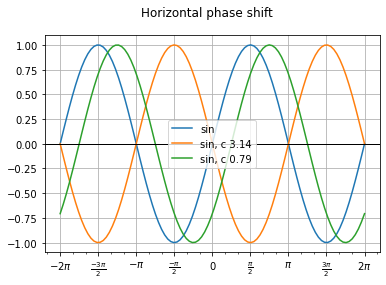

In [4]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y0 = np.sin(x)
c1 = np.pi
y1 = sinusoidal(np.sin, x, c = c1)
c2 = 0.25 * np.pi
y2 = sinusoidal(np.sin, x, c = c2)
xy(x , [y0, y1, y2], ['sin', f'sin, c {c1:0.2f}', f'sin, c {c2:0.2f}'], 'Horizontal phase shift')

Any value of D other than zero shifts the graph up or down

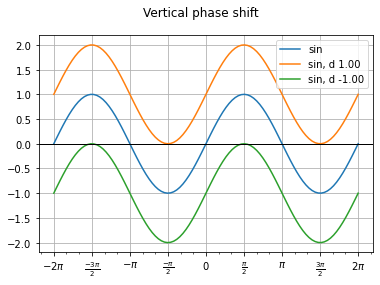

In [5]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y0 = np.sin(x)
d1 = 1
y1 = sinusoidal(np.sin, x, d = d1)
d2 = -1
y2 = sinusoidal(np.sin, x, d = d2)
xy(x , [y0, y1, y2], ['sin', f'sin, d {d1:0.2f}', f'sin, d {d2:0.2f}'], 'Vertical phase shift')

## Ex. 1. Finding the components of circular motion
A point rotates around a circle of radius 3 centered at the origin. Sketch a graph of the x, y coordinates of the point as a function of the angle of rotation.

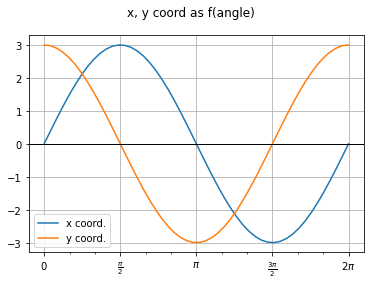

In [15]:
r = 3.
x = np.linspace(0, 2*np.pi, 50)
x0 = r * np.cos(x)
y0 = r * np.sin(x)
xy(x , [y0, x0, y0], ['x coord.', 'y coord.'], 'x, y coord as f(angle)')

Text(0.5, 1.0, 'Circular motion')

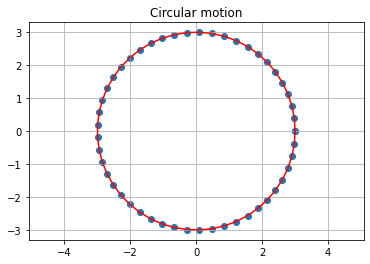

In [16]:
plt.scatter(x0, y0)
plt.plot(x0, y0, 'red')
plt.grid()
plt.axis('equal')
plt.title('Circular motion')

## Ex 2. Finding the components of circular motion
A circle with radius 3 ft is mounted with its center 4 ft off the ground. The point closest to the ground is labeled P, as shown in Figure 23. Sketch a graph of the height above the ground of the point P as the circle is rotated; then find a function that gives the height in terms of the angle of rotation.<br>
<img src='circular_motion.png' width="200" height="200">

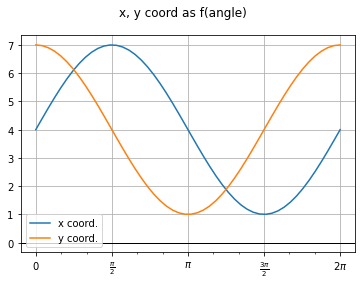

In [22]:
r = 3.
d = 4
x = np.linspace(0, 2*np.pi, 50)
x0 = sinusoidal(np.cos, x, a = r, d=d)
y0 = sinusoidal(np.sin, x, a = r, d=d)
xy(x , [y0, x0, y0], ['x coord.', 'y coord.'], 'x, y coord as f(angle)')

Text(0.5, 1.0, 'Circular motion')

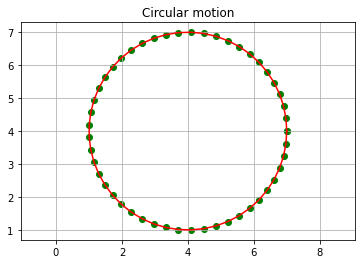

In [28]:
plt.scatter(x0, y0, color='green')
plt.plot(x0, y0, 'red')
plt.grid()
plt.axis('equal')
plt.title('Circular motion')

## Ex. 3. Spring
A weight is attached to a spring that is then hung from a board, as shown in Figure below. As the spring oscillates up and down, the position y of the weight relative to the board ranges from −1 in. (at time x = 0) to −7 in. (at time x = π) below the board. Assume the position of y is given as a sinusoidal function of x. Sketch a graph of the function, and then find a cosine function that gives the position y in terms of x.<br>

<img src='trig_funcs_spring.png' width="200" height="200">


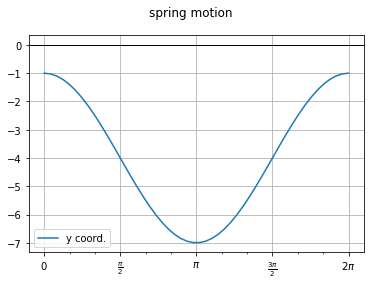

In [42]:
r = 3. ; d = -4
x = np.linspace(0, 2*np.pi, 50)
y = sinusoidal(np.cos, x, a = r, d=d)
xy(x , [y,], ['y coord.', ], 'spring motion')

## Ex 4. Ferris wheel
The London Eye is a huge Ferris wheel with a diameter of 135 meters (443 feet). It completes one rotation every 30 minutes. Riders board from a platform 2 meters above the ground. Express a rider’s height above ground as a function of time in minutes. <br>
<img src="trig_funcs_ferris_wheel.svg" width="200" height="200">


In [8]:
# Amplitude
A = 135 / 2
# Midline 
D = A + 2
# Period
P = 2 * np.pi / 30
print('A = ', A, ', D = ', D, ', P = ', f'{P:0.1f}')

A =  67.5 , D =  69.5 , P =  0.2


Text(0.5, 1.0, 'H vs time')

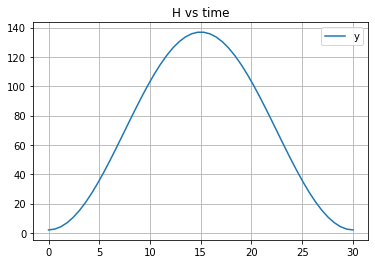

In [38]:
x = np.linspace(15, 15+30, 50)
xfw = sinusoidal(np.sin, x, a=A, b=P, d=D )
yfw = sinusoidal(np.cos, x, a=A, b=P, d=D )
plt.plot(x-15, yfw, label='y')
plt.legend()
plt.grid()
plt.title('H vs time')

In [37]:
print('y max =', sinusoidal(np.cos, 30, a=A, b=P, d=D ))

y max = 137.0


Text(0.5, 1.0, 'Circular motion')

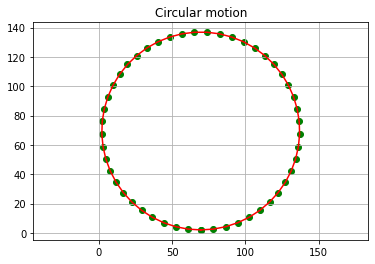

In [39]:
plt.scatter(xfw, yfw, color='green')
plt.plot(xfw, yfw, 'red')
plt.grid()
plt.axis('equal')
plt.title('Circular motion')

# Graphing tangent func

Text(0.5, 0.98, 'tan')

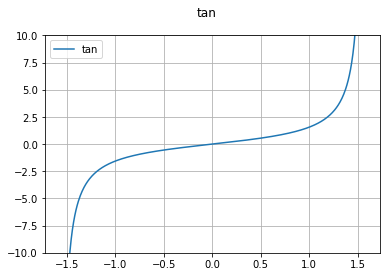

In [66]:
x = np.linspace(-0.5*np.pi, 0.5*np.pi, 500)
y = np.tan(x)
fig, ax = plt.subplots()
ax.plot(x, y, label='tan')
ax.legend()
ax.grid()
ax.set_ylim(-10, 10)
#ax.axis('equal')
fig.suptitle('tan')

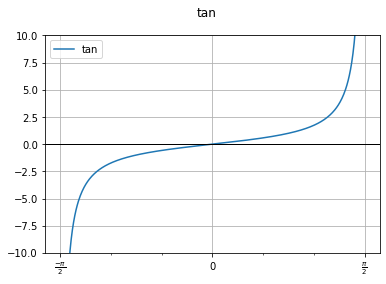

In [69]:
xy(x , [y,], ['tan',], 'tan', ylimit=10)

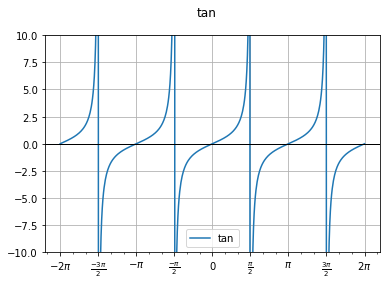

In [70]:
x = np.linspace(-2*np.pi, 2*np.pi, 500)
y = np.tan(x)
xy(x , [y,], ['tan',], 'tan', ylimit=10)

## Features of the graph of $ y = A \tan(B x) $

* The stretching factor is $∣ A ∣$.<br>
* The period is $ P = {\large \frac{\pi} {|B|}} $
* The domain is all real numbers x, where $x \neq {\large  \frac{\pi} {2 |B|} + \frac{\pi} {|B|}}k $ such that k is an integer
* The range is (−∞, ∞).
* The asymptotes occur at $x = {\large  \frac{\pi} {2 |B|} + \frac{\pi} {|B|}}k $ , where k is an integer.
* $y = A\tan{(Bx)}$ is an odd function.

### Ex1 Sketching a compressed tan

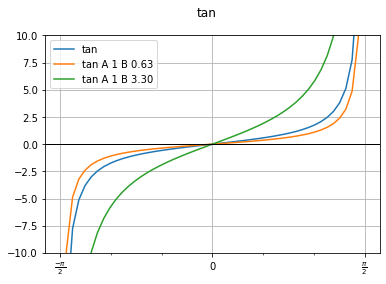

In [32]:
A = 1
B1 = 0.2*np.pi
x = np.linspace(-np.pi/2, np.pi/2, 50)
y = np.tan(x)
y1 = tan(x, A, B1)
B2 = 1.05*np.pi
y2 = tan(x, A, B2)
xy(x , [np.tan(x), y1, y2], ['tan', f'tan A {A} B {B1:0.2f}', f'tan A {A} B {B2:0.2f}'], 'tan', ylimit=10)

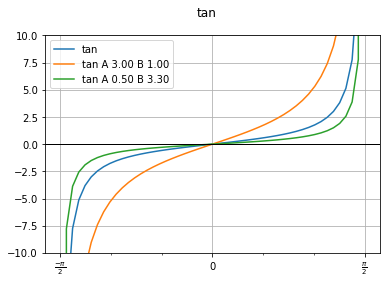

In [33]:
B = 1
A1 = 3
x = np.linspace(-np.pi/2, np.pi/2, 50)
y = np.tan(x)
y1 = tan(x, A1)
A2 = 0.5
y2 = tan(x, A2)
xy(x , [np.tan(x), y1, y2], ['tan', f'tan A {A1:0.2f} B {B:0.2f}', f'tan A {A2:0.2f} B {B2:0.2f}'], 'tan', ylimit=10)

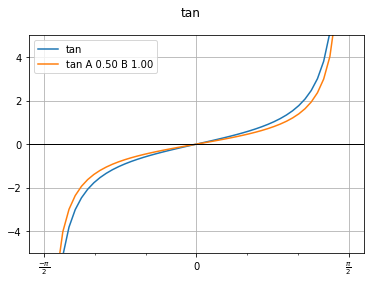

In [38]:
A1 = 0.5
B1 = 0.5*np.pi
x = np.linspace(-np.pi/2, np.pi/2, 50)
y = np.tan(x)
y1 = tan(x, A1, B1)
xy(x , [np.tan(x), y1], ['tan', f'tan A {A1:0.2f} B {B:0.2f}'], 'tan', ylimit=5)

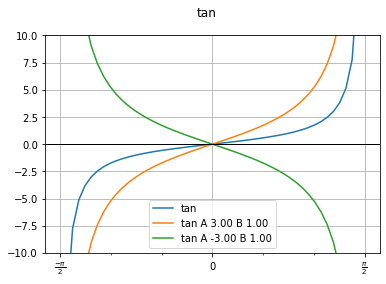

In [4]:
B = 1
A1 = 3
x = np.linspace(-np.pi/2, np.pi/2, 50)
y = np.tan(x)
y1 = tan(x, A1)
A2 = -3
y2 = tan(x, A2)
xy(x , [np.tan(x), y1, y2], ['tan', f'tan A {A1:0.2f} B {B:0.2f}', f'tan A {A2:0.2f} B {B:0.2f}'], 'tan', ylimit=10)

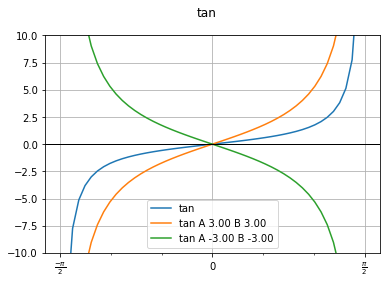

In [5]:
A = 1
B1 = 3
x = np.linspace(-np.pi/2, np.pi/2, 50)
y = np.tan(x)
y1 = tan(x, B1)
B2 = -3
y2 = tan(x, B2)
xy(x , [np.tan(x), y1, y2], ['tan', f'tan A {A1:0.2f} B {B1:0.2f}', 
                             f'tan A {A2:0.2f} B {B2:0.2f}'], 'tan', ylimit=10)

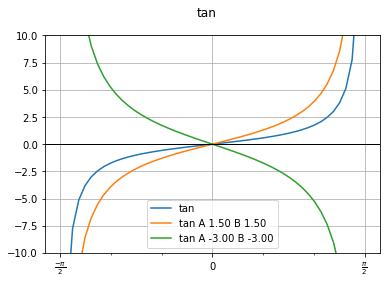

In [16]:
x = np.linspace(-np.pi/2, np.pi/2, 50)
y = np.tan(x)

A1 = 1.5
B1 = 1.5
y1 = tan(x, A1, B1)

A = -3
B2 = -3
y2 = tan(x, B2)

xy(x , [np.tan(x), y1, y2], ['tan', f'tan A {A1:0.2f} B {B1:0.2f}', 
                             f'tan A {A2:0.2f} B {B2:0.2f}'], 'tan', ylimit=10)

# Graphs of secant and cosecant functions

## Features of the graph of y = Asec(Bx)
* The stretching factor is ∣ A ∣ .
* The period is 2π / |B|
* The domain is x ≠ π / 2|B|k, where k is an odd integer.
* The range is (−∞, − ∣ A ∣ ] ∪ [ ∣ A ∣ , ∞).
* The vertical asymptotes occur at x = π / |B|k, where k is an odd integer.
* There is no amplitude.
* y = Asec(Bx) is an even function because cosine is an even function.

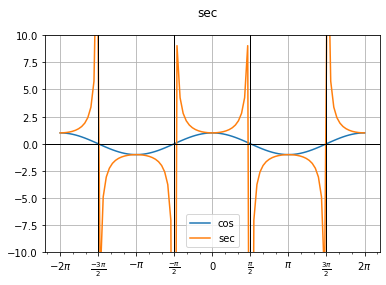

In [23]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.cos(x)

xy(x , [np.cos(x), 1/np.cos(x),], ['cos', f'sec',], 'sec', ylimit=10, 
   vlines=(-3*np.pi/2, 3*np.pi/2, -np.pi/2, np.pi/2))

## features of the graph of y = Asec(Bx − C) + D

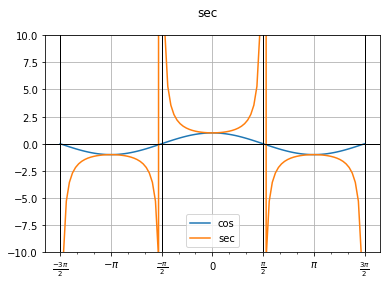

In [28]:
x = np.linspace(-3*np.pi/2, 3*np.pi/2, 100)
y = np.cos(x)

xy(x , [np.cos(x), 1/np.cos(x),], ['cos', f'sec',], 'sec', ylimit=10, 
   vlines=(-3*np.pi/2, 3*np.pi/2, -np.pi/2, np.pi/2))

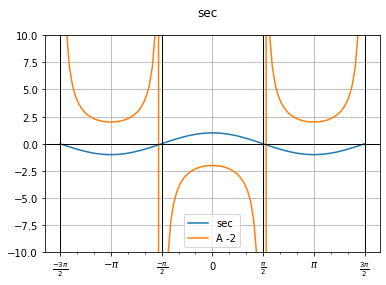

In [34]:
x = np.linspace(-3*np.pi/2, 3*np.pi/2, 100)
y = np.cos(x)

A = -2
y1 = A/np.cos(x)

xy(x , [np.cos(x), y1], ['sec', f'A {A}',], 'sec', ylimit=10, 
   vlines=(-3*np.pi/2, 3*np.pi/2, -np.pi/2, np.pi/2))

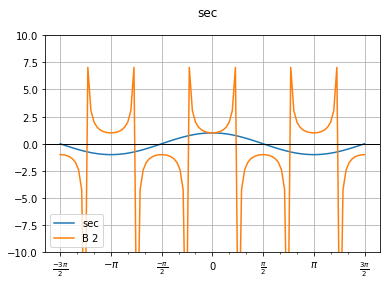

In [36]:
x = np.linspace(-3*np.pi/2, 3*np.pi/2, 100)
y = np.cos(x)

B = 2
y1 = 1/np.cos(B*x)

xy(x , [np.cos(x), y1], ['sec', f'B {B}',], 'sec', ylimit=10)

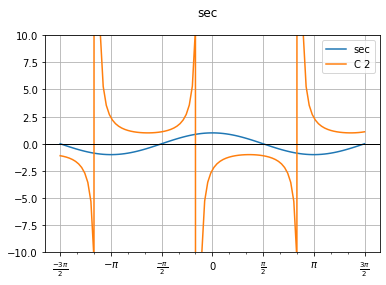

In [38]:
x = np.linspace(-3*np.pi/2, 3*np.pi/2, 100)
y = np.cos(x)

C = 2
y1 = 1/np.cos(x+C)

xy(x , [np.cos(x), y1], ['sec', f'C {C}',], 'sec', ylimit=10)

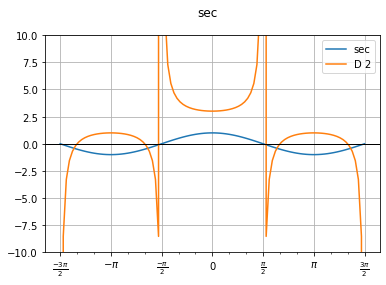

In [39]:
x = np.linspace(-3*np.pi/2, 3*np.pi/2, 100)
y = np.cos(x)

D = 2
y1 = (1/np.cos(x)) +D

xy(x , [np.cos(x), y1], ['sec', f'D {D}',], 'sec', ylimit=10)

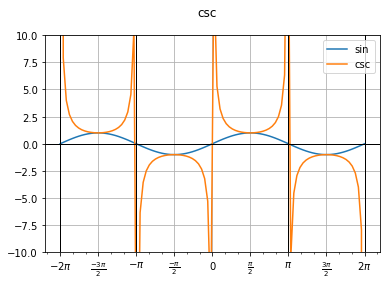

In [44]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = 1/np.sin(x)

xy(x , [np.sin(x), y,], ['sin', f'csc',], 'csc', ylimit=10, 
   vlines=(-2*np.pi, 2*np.pi, -np.pi, np.pi))

## features of the graph of y = Acsc(Bx − C) + D

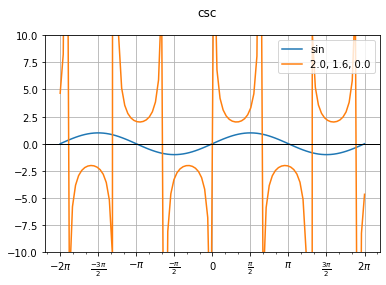

In [65]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)

a=2
b=np.pi/2
d=0
y1 = a / np.sin(x*b) + d

xy(x , [np.sin(x), y1], ['sin', f'{a:0.1f}, {b:0.1f}, {d:0.1f}'], 'csc', ylimit=10)

In [66]:
a = (1,2,1)
' '.join(map(str,a))

'1 2 1'

## Exercises

### Ex. 1. 
Suppose the function $ y = 5 tan( \cfrac{pi}{4} t) $ marks the distance in the movement of a light beam from the top of a police car across a wall where t is the time in seconds and y is the distance in feet from a point on the wall directly across from the police car.
1. Find and interpret the stretching factor and period.
1. Graph on the interval [0, 5].
1. Evaluate f (1) and discuss the function’s value at that input.

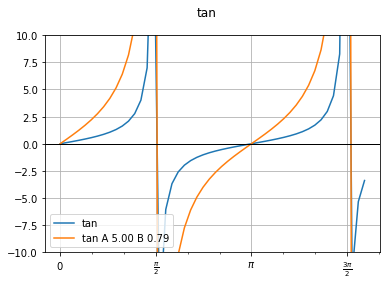

In [28]:
A = 5
B = 0.25 * np.pi
x = np.linspace(0, 5, 50)
y = np.tan(x)
y1 = tan(x, A, B)
xy(x , [y, y1], ['tan', f'tan A {A:0.2f} B {B:0.2f}'], 'tan', ylimit=10)

* The period is $ \cfrac{\pi}{∣ B ∣} = \cfrac{\pi}{\cfrac{\pi}{4}} = 4 $, every 4 seconds, the beam of light sweeps the wall.
* The stretching factor is $∣ A ∣ = 5$, the beam of light will have moved 5 ft after half the period (2 seconds).
* Vertical asymptotes  $ \cfrac{\pi}{2 B} + \cfrac{\pi}{| B |} k = 
 \cfrac{1}{2\cfrac{\pi}{4}} = 2, \;\;
 2 + \cfrac{\pi}{\cfrac{\pi}{4} } 1 
 = 2 + 4 = 6 , \;\;...$

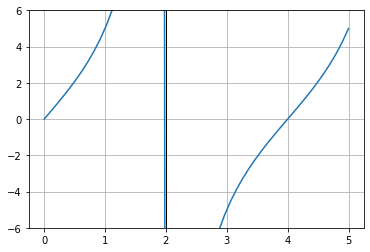

In [29]:
x = np.linspace(0, 5, 50)
y = A*np.tan(B*x)
fig, ax = plt.subplots()
ax.plot(x, y); ax.axvline(2, color='black', lw=1);
ax.set_ylim(-6, 6); ax.grid()

In [30]:
x1 = 1
print('f(1) =', 5 * np.tan(x1 * np.pi / 4))

f(1) = 4.999999999999999


after 1 second, the beam of light has moved 5 ft from the spot across from the police car.

### Ex. 1 bis
The function $ f(x) = 20 \tan ( \cfrac{\pi}{10}x ) $ marks the distance in the movement of a light beam from a police car across a wall for time x, in seconds, and distance $ f(x)$, in feet.
* Graph on the interval [0, 5].
* Find and interpret the stretching factor, period, and asymptote.
* Evaluate f (1) and f (2.5) and discuss the function’s values at those inputs.

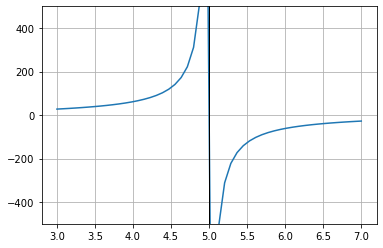

In [20]:
A = 20
B = 0.1 * np.pi

x = np.linspace(3, 7, 50)
y = A*np.tan(B*x)

fig, ax = plt.subplots()
ax.plot(x, y); ax.axvline(5, color='black', lw=1)
ax.set_ylim(-500, 500); 
ax.grid()


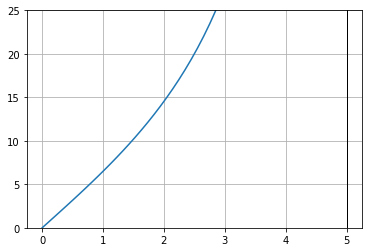

In [23]:
x = np.linspace(0, 5, 50)
y = A*np.tan(B*x)

fig, ax = plt.subplots()
ax.plot(x, y); ax.axvline(5, color='black', lw=1)
ax.set_ylim(0, 25); 
ax.grid()


* The period is $ \cfrac{\pi}{∣ B ∣} = \cfrac{\pi}{\cfrac{\pi}{10}} = 10 $, every 10 seconds, the beam of light sweeps the wall.
* The stretching factor is $∣ A ∣ = 20$, the beam of light will have moved 20 ft after half the period (5 seconds).
* Vertical asymptotes  $ \cfrac{\pi}{2 B} + \cfrac{\pi}{| B |} k = 
 \cfrac{\pi}{2\cfrac{\pi}{10}} = 5, \;\;
 5 + \cfrac{\pi}{\cfrac{\pi}{10} } 1 
 = 5 + 10 = 15 , \;\;...$

In [38]:
for x1 in (1, 2.5):
    y1 = 20 * np.tan(x1 * np.pi / 10)
    print(f'f({x1}) =', f'{y1:0.1f}:', f'after {x1} s, the beam of light has moved {y1:0.1f} ft from the spot across from the police car.')

f(1) = 6.5: after 1 s, the beam of light has moved 6.5 ft from the spot across from the police car.
f(2.5) = 20.0: after 2.5 s, the beam of light has moved 20.0 ft from the spot across from the police car.


### Ex. 2
Standing on the shore of a lake, a fisherman sights a boat far in the distance to his left. Let __x__, measured
in radians, be the angle formed by the line of sight to the ship and a line due north from his position.
Assume due __north is 0 and x is measured negative to the left__ and positive to the right. (See Figure below)
The boat travels from due __west to due east__ and, ignoring the curvature of the Earth, __the distance
d(x)__, in kilometers, from the fisherman to the boat is given by the function __d(x) = 1.5sec(x)__.<br>

<img src='trig_funcs_fisherman.PNG' width="300" height="200">

$ B = 1 $ <br>
The domain is $ x \neq \cfrac{\pi}{2\cdot B} k,  \;\;
 x \neq \cfrac{\pi}{2} k,  $, where k is an odd integer.